In [ ]:
using DifferentialEquations
using Plots
using PyPlot

In [2]:
function eomKv!(du,u,p,t)   # I have reverse the evolution direction by puting an overall minus to the right-hand side of EOMs
  K1,K2,v1,v2 = u
  β,Δ = p
  du[1] = dK1 = -((exp(-v1-2*v2 )*(β^2*Δ*exp(v1+2*v2)*cos(2*β*sqrt(Δ)*K1)*cos(β*sqrt(Δ)*K2)+2*exp(v1+4*v2)*sin(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2)+exp(2*(v1+v2))*sin(4*β*sqrt(Δ)*K1)* sin(2*β*sqrt(Δ)*K2)-3*exp(2*(v1+v2))*(cos(2*β*sqrt(Δ)*K1))^2*(sin(β*sqrt(Δ)*K2))^2-β*sqrt(Δ)*K2*exp(v1+2v2)*(sin(2*β*sqrt(Δ)*K2)*(exp(2*v2)-exp(v1)*(cos(2*β*sqrt(Δ)*K1))^2)+2*exp(2v2)*sin(2*β*sqrt(Δ)*K1)*cos(β*sqrt(Δ)*K2))+3*exp(2*(v1+v2))*cos(2*β*sqrt(Δ)*K1)*(sin(β*sqrt(Δ)*K2))^2*cos(β*sqrt(Δ)*K2)+2*β*sqrt(Δ)*K1*exp(v1+2v2)*sin(2*β*sqrt(Δ)*K2)*(exp(2*v2)*sin(2*β*sqrt(Δ)*K1)*csc(β*sqrt(Δ)*K2)+exp(v1)*(sin(2*β*sqrt(Δ)*K1))^2-exp(v1)+exp(2*v2))-exp(3*v1)*(cos(2*β*sqrt(Δ)*K1))^3*(sin(β*sqrt(Δ)*K2))^2*cos(β*sqrt(Δ)*K2)+exp(v1+4*v2)*(sin(β*sqrt(Δ)*K2))^2-β^2*Δ*exp(4*v2)))/(4*β^2*Δ*(exp(v1)*sin(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2)+exp(2*v2))))
  du[2] = dK2 = -((-exp(v1-2*v2)*(cos(2*β*sqrt(Δ)*K1))^2*(sin(β*sqrt(Δ)*K2))^2+2*sin(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2)-4*β*sqrt(Δ)*K1*cos(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2)+2*β*sqrt(Δ)*K2*cos(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2)+(sin(β*sqrt(Δ)*K2))^2+β^2*Δ*exp(-v1))/(2*β^2*Δ))
  du[3] = dv1 = -(-(2*cos(2*β*sqrt(Δ)*K1)*sin(β*sqrt(Δ)*K2))/(β*sqrt(Δ)))
  du[4] = dv2 = -(-(cos(β*sqrt(Δ)*K2)*(sin(2*β*sqrt(Δ)*K1)+sin(β*sqrt(Δ)*K2)))/(β*sqrt(Δ)))
end

eomKv! (generic function with 1 method)

In [115]:
xM=parse(Double64,"3.0")*10^8
Rs=parse(Double64,"1.0")*10^8
u0 = [1/(6*xM),-(2/(3*xM)),log((3/2)*(3/2)^(1/3)*Rs^(2/3)*xM^(4/3)),log((3/2)^(1/3)*Rs^(2/3)*xM^(1/3))]

4-element Array{Double64,1}:
  5.555555555555555e-10
 -2.222222222222222e-9
 38.84679801693976
 18.922039876211123

In [121]:
using DoubleFloats
xM=parse(Double64,"3.0")*10^8
Rs=parse(Double64,"1.0")*10^8
u0 = [1/(6*xM),-(2/(3*xM)),log((3/2)*(3/2)^(1/3)*Rs^(2/3)*xM^(4/3)),log((3/2)^(1/3)*Rs^(2/3)*xM^(1/3))]
tspan = (parse(Double64,"0"),xM+350.0)
p = [parse(Double64,"1.0"),parse(Double64,"0.1")]
prob = ODEProblem(eomKv!,u0,tspan,p)
sol = solve(prob,AutoVern7(Rodas5()),reltol=1e-30,abstol=1e-30)

retcode: Success
Interpolation: automatic order switching interpolation
t: 880072-element Array{Double64,1}:
     0.0
     0.0007699265342194873
     0.00846919187641436
     0.08546184529836309
     0.8553883795178504
     8.554653721712723
    72.7185562633412
   454.32744778183314
  2366.043618485821
 10883.158352539584
 28461.429549635064
 50307.189099060844
 74603.69611852568
     ⋮
     3.0000034994681704e8
     3.000003499520679e8
     3.0000034995732915e8
     3.000003499626122e8
     3.0000034996789384e8
     3.0000034997318655e8
     3.000003499784997e8
     3.000003499838165e8
     3.000003499891568e8
     3.000003499945018e8
     3.0000034999986476e8
     3.0000035e8
u: 880072-element Array{Array{Double64,1},1}:
 [5.555555555555555e-10, -2.222222222222222e-9, 38.84679801693976, 18.922039876211123]
 [5.555555555569814e-10, -2.2222222222279255e-9, 38.84679801693634, 18.922039876210267]
 [5.555555555712393e-10, -2.222222222284957e-9, 38.84679801690212, 18.922039876201712]
 [5.

In [122]:
plot(sol,tspan=[xM-20,xM+350.])

In [131]:
sol(xM+350.)

4-element Array{Double64,1}:
  2.4836470664490267
 -1.8569922895272928
 -2.0808616326556857
 89.83191036711858

In [75]:
using ForwardDiff

In [125]:
dsol=x->ForwardDiff.derivative(sol,x)
ddsol=x->ForwardDiff.derivative(dsol,x)

#9 (generic function with 1 method)

In [126]:
KK1(z)=sol(z)[1]
KK2(z)=sol(z)[2]
vv1(z)=sol(z)[3]
vv2(z)=sol(z)[4]
dKK1(z)=dsol(z)[1]
dKK2(z)=dsol(z)[2]
dvv1(z)=dsol(z)[3]
dvv2(z)=dsol(z)[4]
ddKK1(z)=ddsol(z)[1]
ddKK2(z)=ddsol(z)[2]
ddvv1(z)=ddsol(z)[3]
ddvv2(z)=ddsol(z)[4]

ddvv2 (generic function with 1 method)

In [127]:
krets(z)=-4*ddvv1(z)*ddvv2(z)-4*ddvv1(z)*dvv2(z)^2-4*exp(vv1(z)-2*vv2(z))*ddvv1(z)^2+2*exp(2*vv1(z)-4*vv2(z))*ddvv1(z)^2+3*ddvv1(z)^2+2*dvv1(z)^2*ddvv2(z)+2*exp(vv1(z)-2*vv2(z))*dvv1(z)^3*dvv2(z)-4*exp(2*vv1(z)-4*vv2(z))*dvv1(z)^3*dvv2(z)-4*dvv1(z)^3*dvv2(z)+2*exp(2 *vv1(z)-4*vv2(z))*dvv1(z)^2*dvv2(z)^2+8*dvv1(z)^2*dvv2(z)^2-8*dvv1(z)*dvv2(z)^3-8*dvv1(z)*dvv2(z)*ddvv2(z)-(1/2)*5*exp(vv1(z)-2*vv2(z))*dvv1(z)^4+(9/4)*exp(2*vv1(z)-4*vv2(z))*dvv1(z)^4-2*exp(-2*vv2(z))*dvv1(z)^2+(3/2)*dvv1(z)^4+2*exp(-vv1(z))*dvv1(z)^2+4*exp(vv1(z)-2*vv2(z))*dvv1(z)*ddvv1(z)*dvv2(z)-4*exp(2*vv1(z)-4*vv2(z))*dvv1(z)*ddvv1(z)*dvv2(z)+4*dvv1(z)*ddvv1(z)*dvv2(z)-6*exp(vv1(z)-2*vv2(z))*dvv1(z)^2*ddvv1(z)+4*exp(2*vv1(z)-4*vv2(z))*dvv1(z)^2*ddvv1(z)+dvv1(z)^2*ddvv1(z)+4*exp(-2*vv1(z))+4*ddvv2(z)^2+4*dvv2(z)^4+8*dvv2(z)^2*ddvv2(z)

krets (generic function with 1 method)

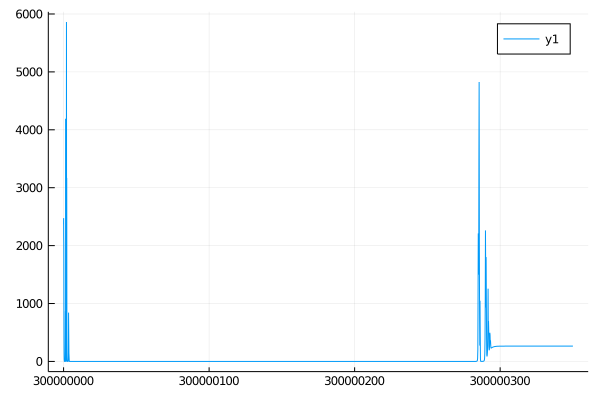

In [130]:
plot(krets,xM,xM+350.)

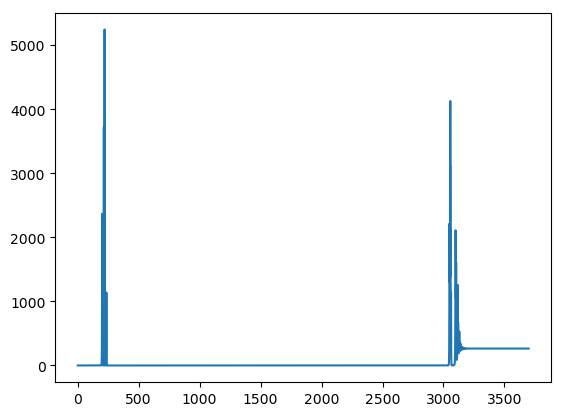

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff24cbd3ef0>

In [132]:
PyPlot.plot(map(krets,xM-20:0.1:xM+350))

In [157]:
β=parse(Double64,"1.0")
Δ=parse(Double64,"0.1")
error1(z)=abs(dKK1(z)+((exp(-vv1(z)-2*vv2(z) )*(β^2*Δ*exp(vv1(z)+2*vv2(z))*cos(2*β*sqrt(Δ)*KK1(z))*cos(β*sqrt(Δ)*KK2(z))+2*exp(vv1(z)+4*vv2(z))*sin(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z))+exp(2*(vv1(z)+vv2(z)))*sin(4*β*sqrt(Δ)*KK1(z))* sin(2*β*sqrt(Δ)*KK2(z))-3*exp(2*(vv1(z)+vv2(z)))*(cos(2*β*sqrt(Δ)*KK1(z)))^2*(sin(β*sqrt(Δ)*KK2(z)))^2-β*sqrt(Δ)*KK2(z)*exp(vv1(z)+2vv2(z))*(sin(2*β*sqrt(Δ)*KK2(z))*(exp(2*vv2(z))-exp(vv1(z))*(cos(2*β*sqrt(Δ)*KK1(z)))^2)+2*exp(2vv2(z))*sin(2*β*sqrt(Δ)*KK1(z))*cos(β*sqrt(Δ)*KK2(z)))+3*exp(2*(vv1(z)+vv2(z)))*cos(2*β*sqrt(Δ)*KK1(z))*(sin(β*sqrt(Δ)*KK2(z)))^2*cos(β*sqrt(Δ)*KK2(z))+2*β*sqrt(Δ)*KK1(z)*exp(vv1(z)+2vv2(z))*sin(2*β*sqrt(Δ)*KK2(z))*(exp(2*vv2(z))*sin(2*β*sqrt(Δ)*KK1(z))*csc(β*sqrt(Δ)*KK2(z))+exp(vv1(z))*(sin(2*β*sqrt(Δ)*KK1(z)))^2-exp(vv1(z))+exp(2*vv2(z)))-exp(3*vv1(z))*(cos(2*β*sqrt(Δ)*KK1(z)))^3*(sin(β*sqrt(Δ)*KK2(z)))^2*cos(β*sqrt(Δ)*KK2(z))+exp(vv1(z)+4*vv2(z))*(sin(β*sqrt(Δ)*KK2(z)))^2-β^2*Δ*exp(4*vv2(z))))/(4*β^2*Δ*(exp(vv1(z))*sin(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z))+exp(2*vv2(z))))))
error2(z)=abs(dKK2(z)+((-exp(vv1(z)-2*vv2(z))*(cos(2*β*sqrt(Δ)*KK1(z)))^2*(sin(β*sqrt(Δ)*KK2(z)))^2+2*sin(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z))-4*β*sqrt(Δ)*KK1(z)*cos(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z))+2*β*sqrt(Δ)*KK2(z)*cos(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z))+(sin(β*sqrt(Δ)*KK2(z)))^2+β^2*Δ*exp(-vv1(z)))/(2*β^2*Δ)))
error3(z)=abs(dvv1(z)+(-(2*cos(2*β*sqrt(Δ)*KK1(z))*sin(β*sqrt(Δ)*KK2(z)))/(β*sqrt(Δ))))
error4(z)=abs(dvv2(z)+(-(cos(β*sqrt(Δ)*KK2(z))*(sin(2*β*sqrt(Δ)*KK1(z))+sin(β*sqrt(Δ)*KK2(z))))/(β*sqrt(Δ))))
nerror(z)=sqrt(error1(z)^2+error2(z)^2+error3(z)^2+error4(z)^2)

nerror (generic function with 1 method)

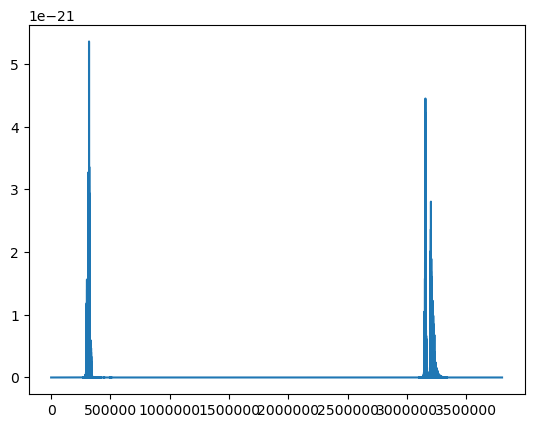

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff1430e80f0>

In [195]:
PyPlot.plot(map(nerror,xM-30:0.0001:xM+350))

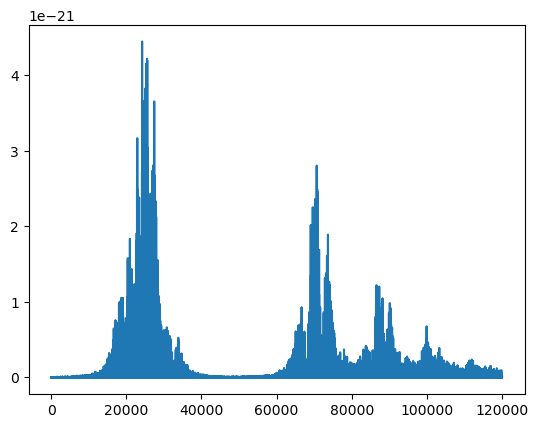

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff24842acc0>

In [190]:
PyPlot.plot(map(nerror,xM+283:0.0001:xM+295))

In [174]:
vector(z)=((KK2(z)-2*KK1(z))*dvv1(z)+2*dKK2(z))


vector (generic function with 1 method)

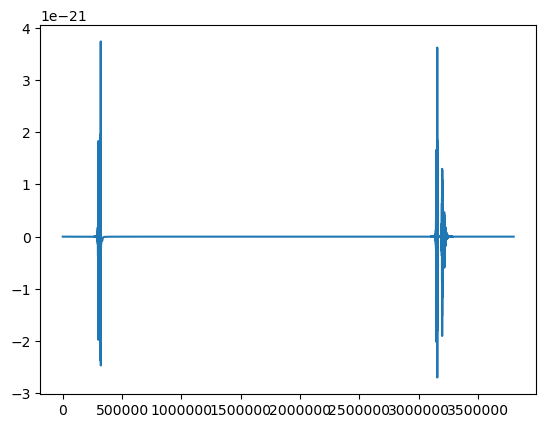

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff15c8562b0>

In [196]:
PyPlot.plot(map(vector,xM-30:0.0001:xM+350))

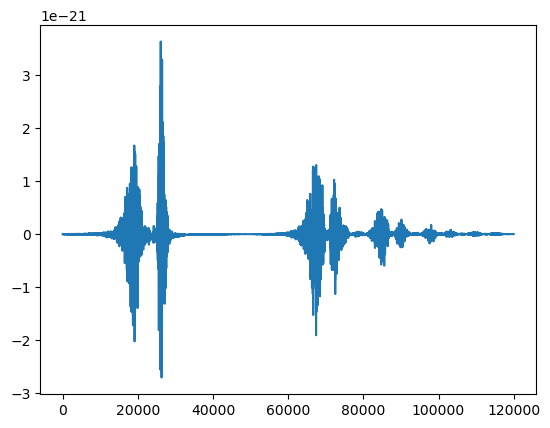

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff24840c4a8>

In [193]:
PyPlot.plot(map(vector,xM+283:0.0001:xM+295))